<a href="https://colab.research.google.com/github/akhila-attem/Retaildata/blob/main/online_retail_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# 1. Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# 2. Remove cancelled orders (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 4. Calculate TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Optional: Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# View cleaned data
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [ ]:
# Use the cleaned dataframe from previous step
basket = df[df['Country'] == "United Kingdom"].groupby(
    ['InvoiceNo', 'Description']
)['Quantity'].sum().unstack().fillna(0)

# Convert quantities to 1s and 0s (binary presence/absence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(basket.head())


<ipython-input-2-093c7687576b>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                         

# **MARKET BASKET ANALYSIS**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# 1. Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# 2. Remove cancelled orders (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 4. Calculate TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Optional: Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# View cleaned data
print(df.head())


# Create the basket dataframe
basket = df[df['Country'] == "United Kingdom"].groupby(
    ['InvoiceNo', 'Description']
)['Quantity'].sum().unstack().fillna(0)

# Convert quantities to 1s and 0s (binary presence/absence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(basket.head())

# Run Apriori to get frequent itemsets
frequent_itemsets_apriori = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


<ipython-input-3-c33c5f1ddc67>:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                         

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# **FP-GROWTH**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# 1. Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# 2. Remove cancelled orders (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 4. Calculate TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Optional: Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# View cleaned data
print(df.head())


# Create the basket dataframe
basket = df[df['Country'] == "United Kingdom"].groupby(
    ['InvoiceNo', 'Description']
)['Quantity'].sum().unstack().fillna(0)

# Convert quantities to 1s and 0s (binary presence/absence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(basket.head())

# Now you can use 'basket' in the fpgrowth function
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.01, use_colnames=True)

rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

print(rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


<ipython-input-1-c29f14c9a187>:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                         

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                       antecedents                           consequents  \
0         (HAND WARMER OWL DESIGN)              (HAND WARMER UNION JACK)   
1         (HAND WARMER UNION JACK)              (HAND WARMER OWL DESIGN)   
2         (HAND WARMER UNION JACK)       (HAND WARMER SCOTTY DOG DESIGN)   
3  (HAND WARMER SCOTTY DOG DESIGN)              (HAND WARMER UNION JACK)   
4  (ASSORTED COLOUR BIRD ORNAMENT)  (WHITE HANGING HEART T-LIGHT HOLDER)   

    support  confidence       lift  
0  0.012493    0.379562  14.427691  
1  0.012493    0.474886  14.427691  
2  0.011352    0.431507  15.617734  
3  0.011352    0.410870  15.617734  
4  0.015376    0.196923   1.740219  


# **ECLAT**

In [ ]:
from itertools import combinations

# Create a vertical dataset: item → list of invoices
vertical_data = {}
for item in basket.columns:
    vertical_data[item] = set(basket.index[basket[item] == 1])

# ECLAT function
def eclat(prefix, items, min_support):
    while items:
        i = items[0]
        new_prefix = prefix + [i]
        transaction_set = vertical_data[i]
        for j in prefix:
            transaction_set = transaction_set & vertical_data[j]
        support = len(transaction_set) / len(basket)
        if support >= min_support:
            print(f"Itemset: {new_prefix}, Support: {support:.4f}")
            remaining_items = [x for x in items if x != i]
            eclat(new_prefix, remaining_items, min_support)
        items = items[1:]

# Run ECLAT with min_support of 1%
eclat([], list(vertical_data.keys())[:30], min_support=0.01)  # Limiting to first 30 items for speed


Itemset: [' SET 2 TEA TOWELS I LOVE LONDON '], Support: 0.0106
Itemset: ['10 COLOUR SPACEBOY PEN'], Support: 0.0120
Itemset: ['12 MESSAGE CARDS WITH ENVELOPES'], Support: 0.0106
Itemset: ['12 PENCIL SMALL TUBE WOODLAND'], Support: 0.0150
Itemset: ['12 PENCILS SMALL TUBE RED RETROSPOT'], Support: 0.0171
Itemset: ['12 PENCILS SMALL TUBE SKULL'], Support: 0.0164
Itemset: ['12 PENCILS TALL TUBE RED RETROSPOT'], Support: 0.0124
Itemset: ['12 PENCILS TALL TUBE SKULLS'], Support: 0.0125
Itemset: ['12 PENCILS TALL TUBE WOODLAND'], Support: 0.0108
Itemset: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS'], Support: 0.0118


# **RFM CLUSTERING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
# Load dataset
df = pd.read_excel('/content/Online Retail.xlsx')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Preview data
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
# Load dataset
df = pd.read_excel('/content/Online Retail.xlsx')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 1. Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# 2. Remove cancelled orders (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Calculate TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


# Preview data (optional, but good for verification)
print(df.head())

# Set reference date (day after last invoice)
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

# Group by CustomerID and calculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Preview RFM table
print(rfm.head())


<ipython-input-27-d86f002a0ea8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2       

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [ ]:
# Choose number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# View cluster distribution
print(rfm['Cluster'].value_counts())


Cluster
3    3053
1    1062
0     211
2      13
Name: count, dtype: int64


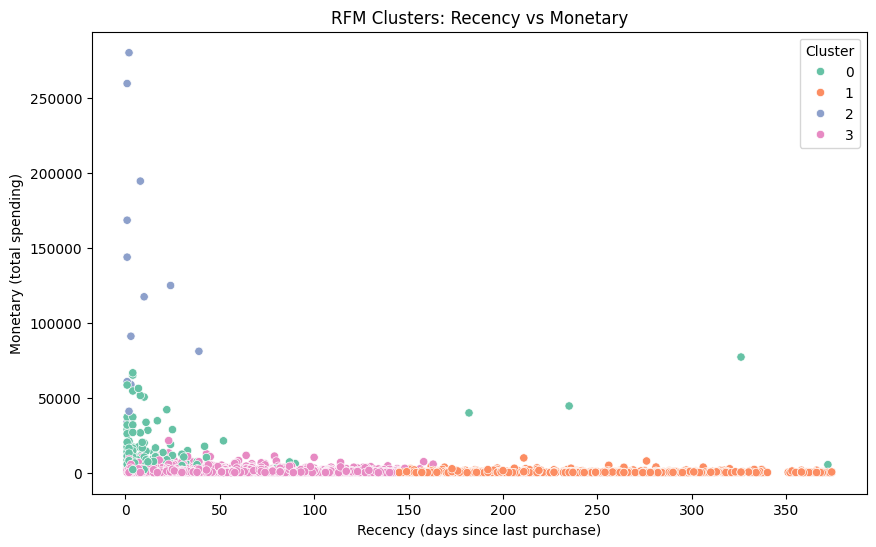

In [ ]:
# Plot Recency vs Monetary by Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('RFM Clusters: Recency vs Monetary')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Monetary (total spending)')
plt.legend(title='Cluster')
plt.show()


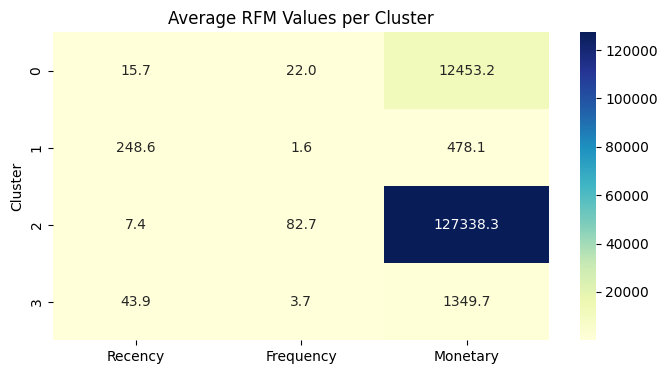

In [ ]:
rfm_cluster_avg = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

plt.figure(figsize=(8,4))
sns.heatmap(rfm_cluster_avg, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average RFM Values per Cluster')
plt.show()


# **RFM**

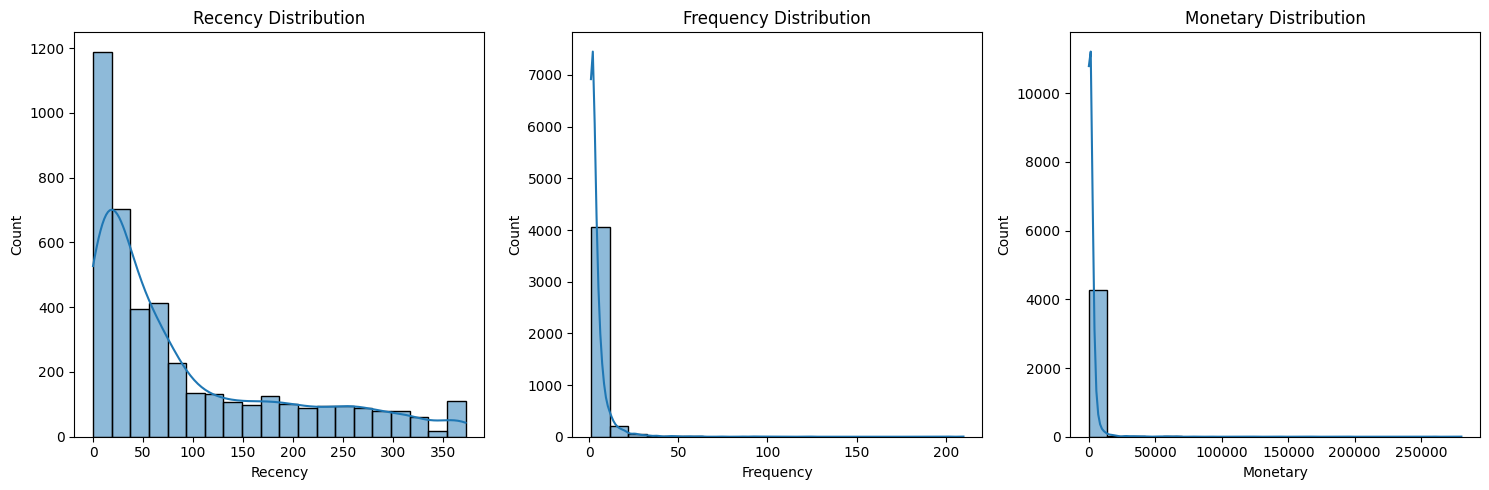

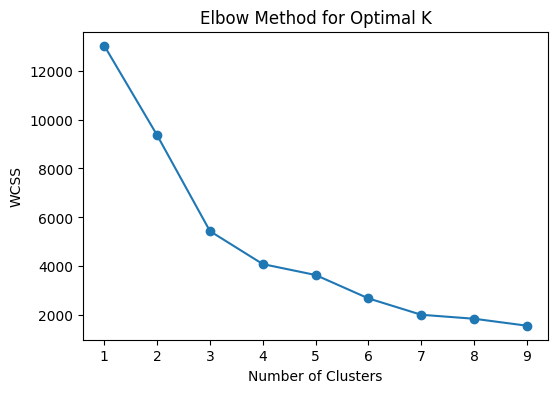

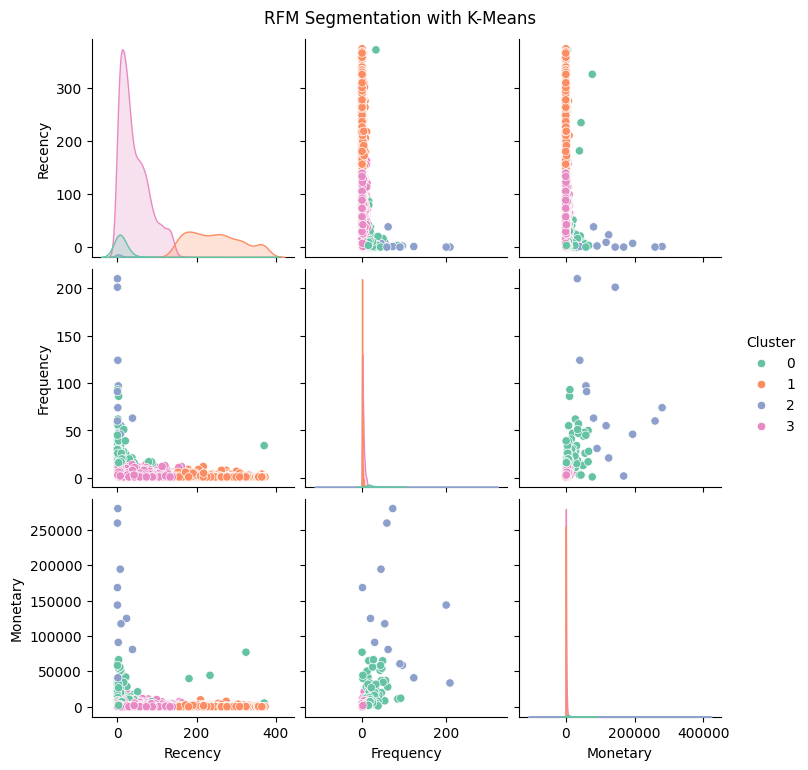

           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15201.928910   14.672986  22.047393   12453.225924
1        15344.258004  247.564030   1.551789     478.107581
2        15435.000000    6.384615  82.692308  127338.313846
3        15290.717982   42.910580   3.655748    1349.698298


In [ ]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#  Load Dataset
df = pd.read_excel("Online Retail.xlsx")

#  Data Cleaning
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#  RFM Calculation
latest_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#  RFM Distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(rfm[col], bins=20, kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

#  Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

#  Elbow Method to choose optimal K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#  Apply K-Means Clustering (choose K=4 or based on Elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

#  Visualize the Clusters
sns.pairplot(rfm, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='Set2')
plt.suptitle("RFM Segmentation with K-Means", y=1.02)
plt.show()

#  Cluster Summary
print(rfm.groupby('Cluster').mean())


<ipython-input-4-0df7d112b4cf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-4-0df7d112b4cf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


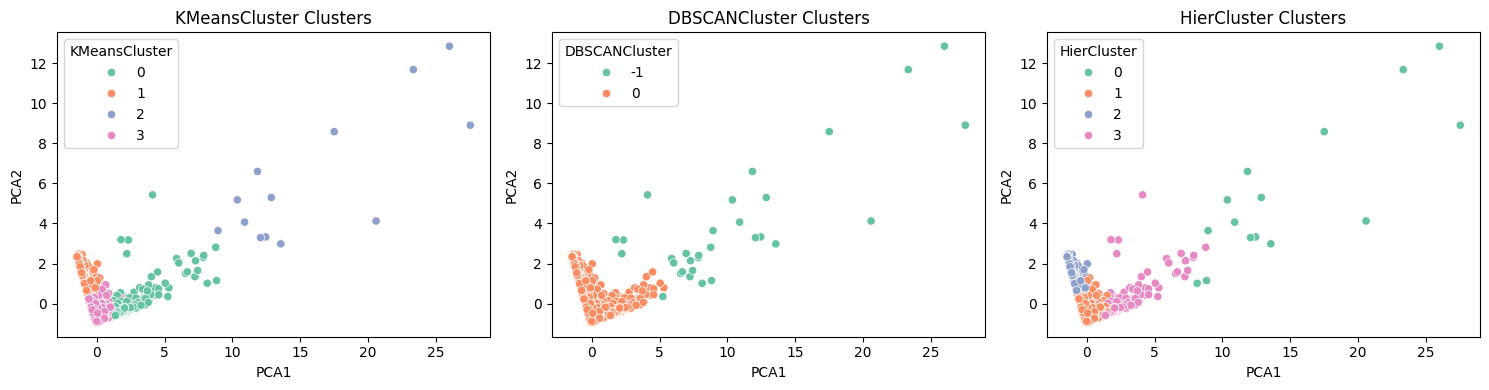

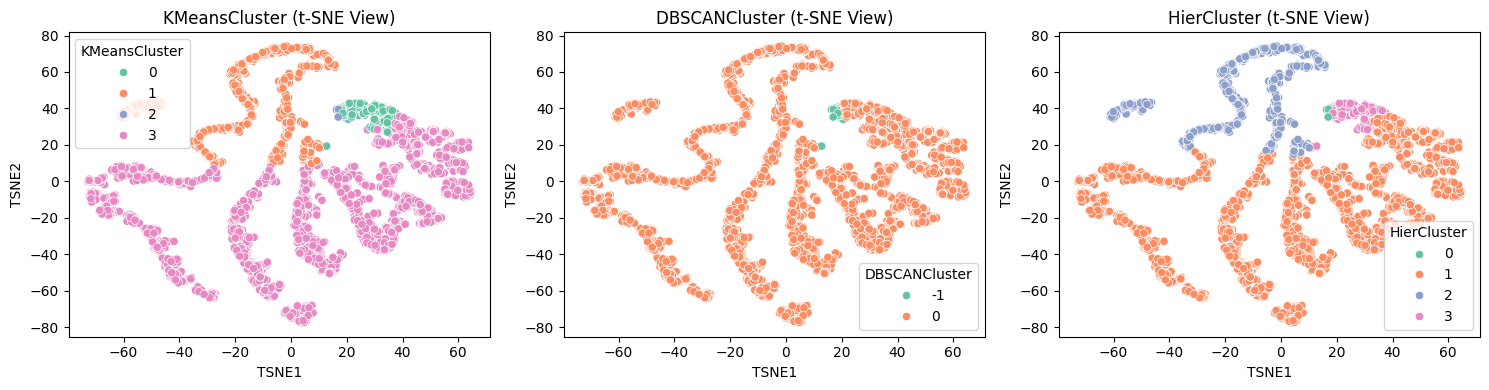

In [ ]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#  Load and Clean Data
df = pd.read_excel("Online Retail.xlsx")
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

#  RFM Calculation
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#  Normalize Features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

#  K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['KMeansCluster'] = kmeans.fit_predict(rfm_scaled)

#  DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
rfm['DBSCANCluster'] = dbscan.fit_predict(rfm_scaled)

#  Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=4)
rfm['HierCluster'] = agglo.fit_predict(rfm_scaled)

#  PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled)
rfm['PCA1'], rfm['PCA2'] = pca_result[:, 0], pca_result[:, 1]

#  Visualize with PCA
plt.figure(figsize=(15, 4))
for i, method in enumerate(['KMeansCluster', 'DBSCANCluster', 'HierCluster']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue=method, palette='Set2')
    plt.title(f"{method} Clusters")
plt.tight_layout()
plt.show()

#  t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(rfm_scaled)
rfm['TSNE1'], rfm['TSNE2'] = tsne_result[:, 0], tsne_result[:, 1]

#  Visualize with t-SNE
plt.figure(figsize=(15, 4))
for i, method in enumerate(['KMeansCluster', 'DBSCANCluster', 'HierCluster']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=rfm, x='TSNE1', y='TSNE2', hue=method, palette='Set2')
    plt.title(f"{method} (t-SNE View)")
plt.tight_layout()
plt.show()


In [ ]:
pip install pandas numpy matplotlib statsmodels prophet scikit-learn tensorflow


# **FORECASTING OF SALES**

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel("Online Retail.xlsx")

# Clean data
df = df[df['InvoiceDate'].notna()]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df = df[df['TotalPrice'] > 0]

# Aggregate daily sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()
daily_sales.columns = ['ds', 'y']
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

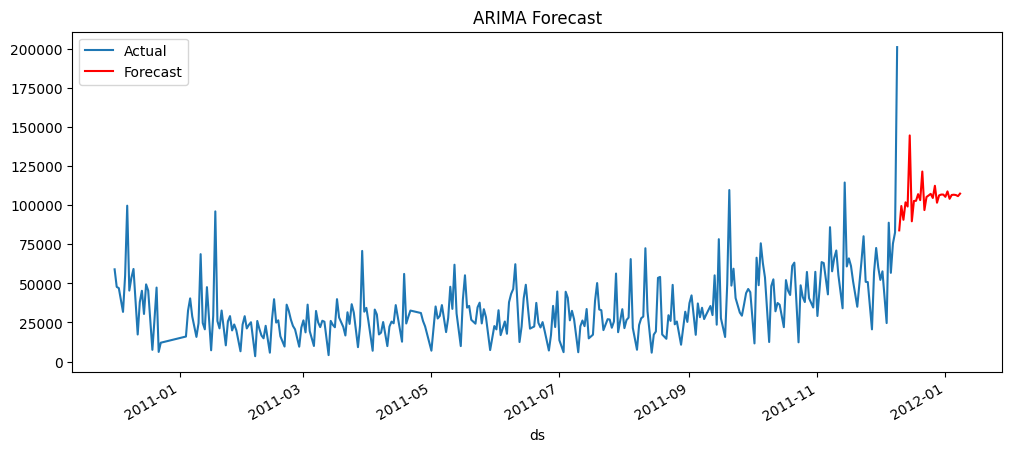

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Set index
arima_data = daily_sales.set_index('ds')['y']

# Fit ARIMA model
model = ARIMA(arima_data, order=(5,1,2))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot
plt.figure(figsize=(12,5))
arima_data.plot(label='Actual')
forecast.index = pd.date_range(start=arima_data.index[-1] + pd.Timedelta(days=1), periods=30)
forecast.plot(label='Forecast', color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()


In [ ]:
pip install pandas matplotlib seaborn openpyxl statsmodels prophet

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Online Retail.xlsx", sheet_name="Online Retail")

# Quick look
print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [ ]:
# Drop rows with missing InvoiceNo, Quantity or UnitPrice <= 0
df = df.dropna(subset=['InvoiceNo', 'InvoiceDate'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Create a Sales column
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime if needed
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate sales by date
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Sales'].sum().reset_index()
daily_sales.columns = ['Date', 'TotalSales']


In [ ]:
# Set index and frequency
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
daily_sales.set_index('Date', inplace=True)
daily_sales = daily_sales.asfreq('D').fillna(0)


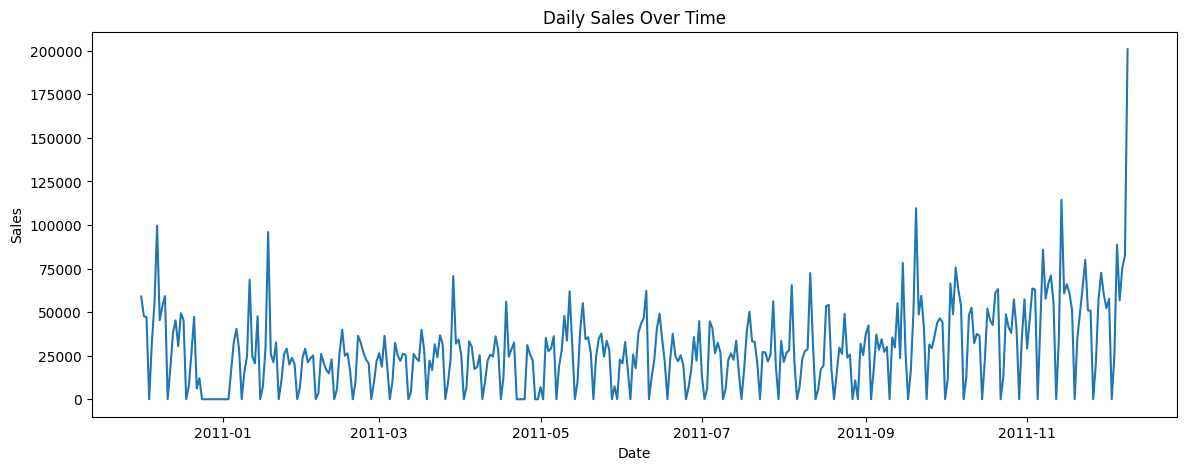

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_sales, x='Date', y='TotalSales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpogdctifb/iiop7rrw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpogdctifb/vfjvtmw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32645', 'data', 'file=/tmp/tmpogdctifb/iiop7rrw.json', 'init=/tmp/tmpogdctifb/vfjvtmw8.json', 'output', 'file=/tmp/tmpogdctifb/prophet_modelvcmrycop/prophet_model-20250526081530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


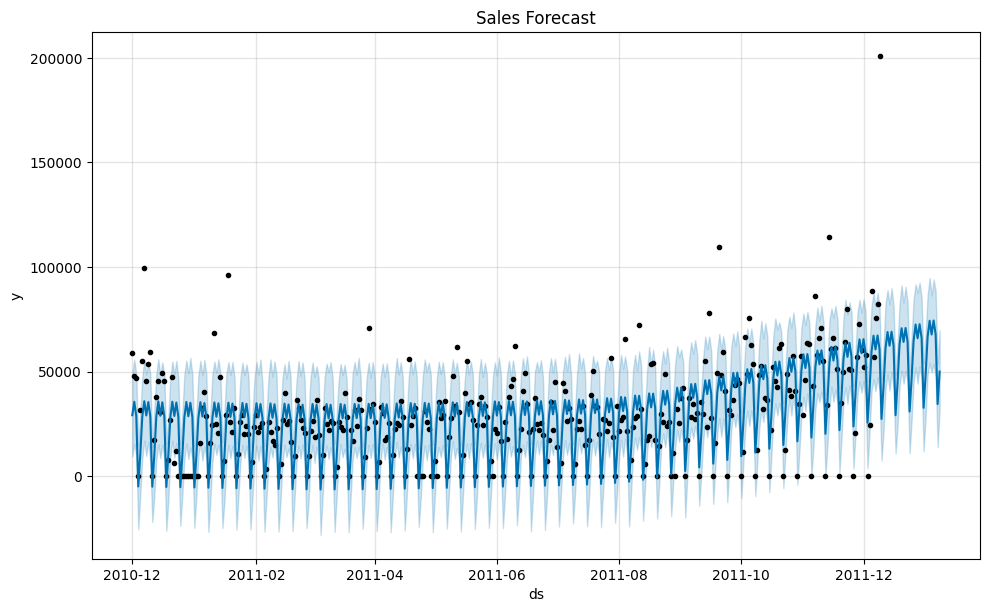

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = daily_sales.reset_index().rename(columns={'Date': 'ds', 'TotalSales': 'y'})

# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

# Forecast for next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train-test split
train = prophet_df[:-30]
test = prophet_df[-30:]

model = Prophet(daily_seasonality=True)
model.fit(train)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Compare predictions
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]
actual = test.set_index('ds')['y']

mae = mean_absolute_error(actual, predicted['yhat'])
rmse = np.sqrt(mean_squared_error(actual, predicted['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpogdctifb/drs48bwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpogdctifb/c7ete2xh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2956', 'data', 'file=/tmp/tmpogdctifb/drs48bwh.json', 'init=/tmp/tmpogdctifb/c7ete2xh.json', 'output', 'file=/tmp/tmpogdctifb/prophet_model7ropaxoo/prophet_model-20250526081550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 19692.40
RMSE: 34561.72


In [ ]:
# Assuming you already ran the previous Prophet code
average_daily_sales = prophet_df['y'].mean()

# Use the MAE and RMSE values you already obtained
mae = 19692.40
rmse = 34561.72

mae_pct = (mae / average_daily_sales) * 100
rmse_pct = (rmse / average_daily_sales) * 100

print(f"Average Daily Sales: ₹{average_daily_sales:.2f}")
print(f"MAE as % of Avg Sales: {mae_pct:.2f}%")
print(f"RMSE as % of Avg Sales: {rmse_pct:.2f}%")


Average Daily Sales: ₹28520.55
MAE as % of Avg Sales: 69.05%
RMSE as % of Avg Sales: 121.18%


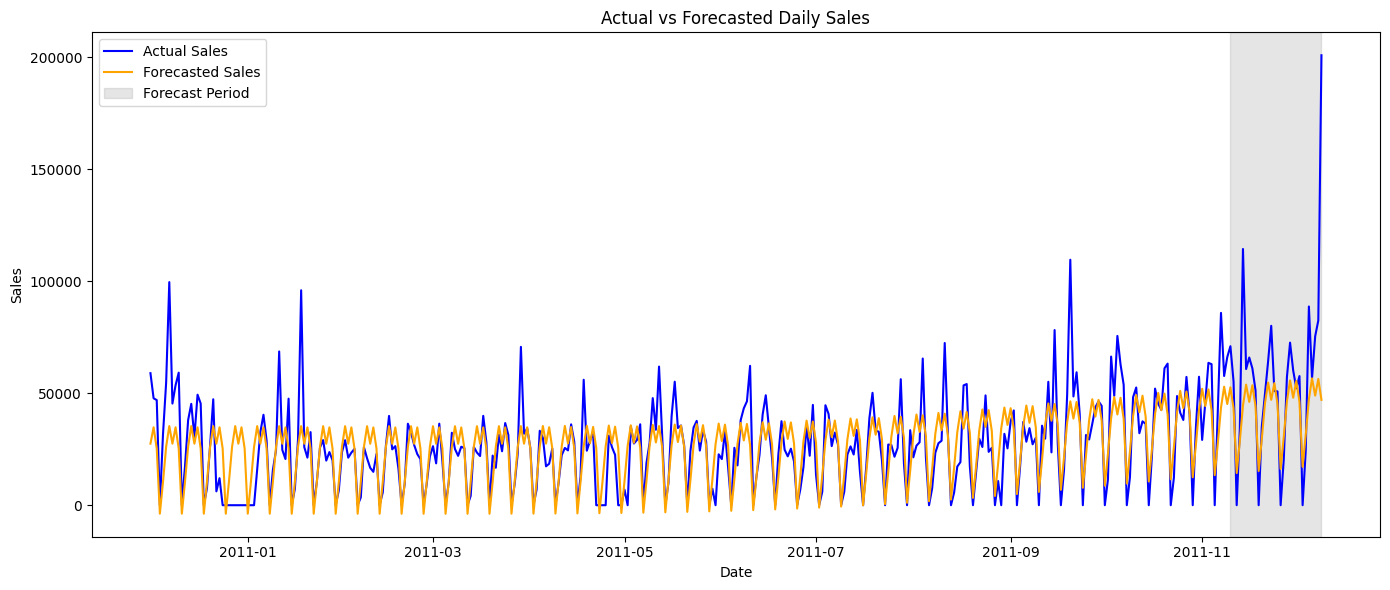

In [ ]:
import matplotlib.pyplot as plt

# Plot last 90 days including forecast
plt.figure(figsize=(14, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Sales', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='orange')
plt.axvspan(forecast['ds'].iloc[-30], forecast['ds'].iloc[-1], color='gray', alpha=0.2, label='Forecast Period')
plt.title('Actual vs Forecasted Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


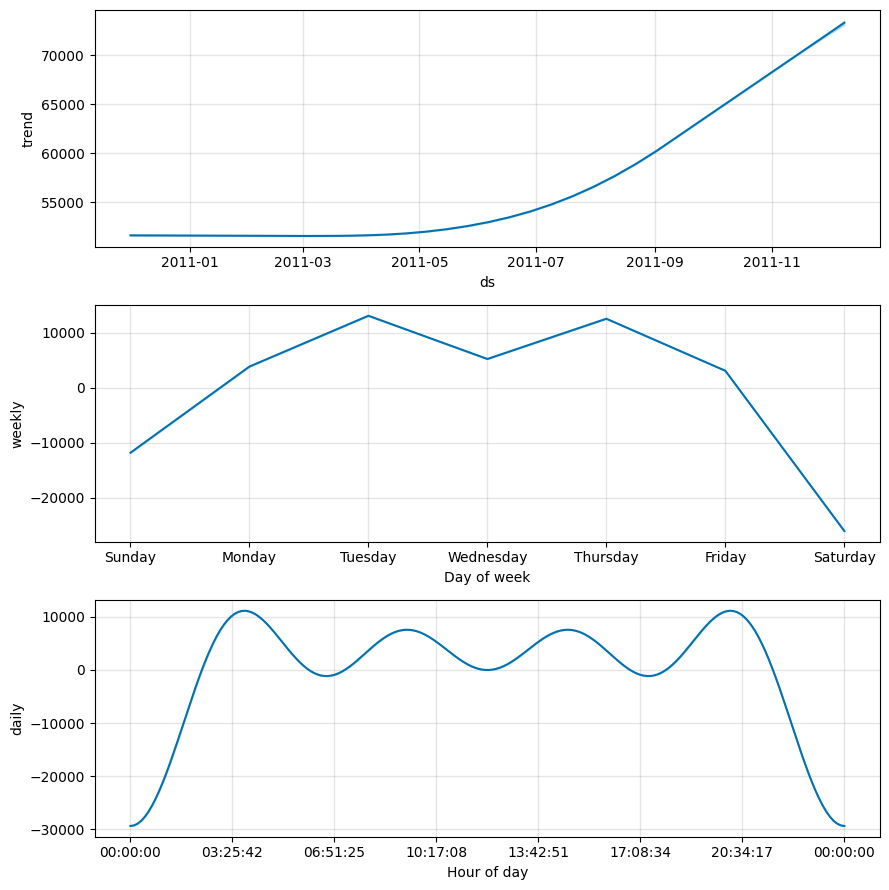

In [ ]:
model.plot_components(forecast)
plt.show()


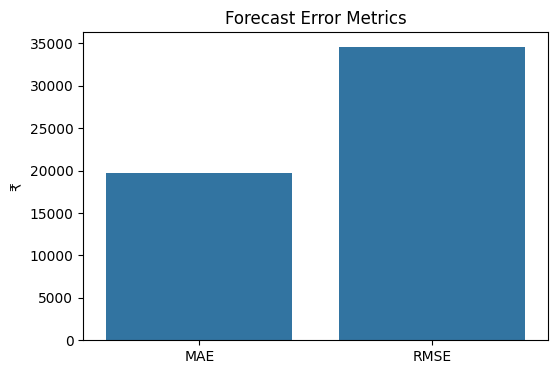

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=['MAE', 'RMSE'], y=[19692.4, 34561.72])
plt.title('Forecast Error Metrics')
plt.ylabel('₹')
plt.show()


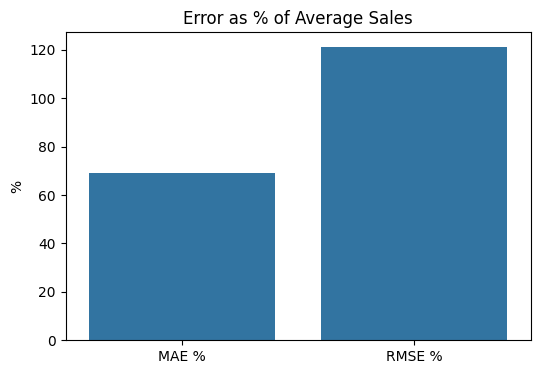

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['MAE %', 'RMSE %'], y=[69.05, 121.18])
plt.title('Error as % of Average Sales')
plt.ylabel('%')
plt.show()


# **PROPHET**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqk3uewb/d1ii8_ew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqqk3uewb/vaadseha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70237', 'data', 'file=/tmp/tmpqqk3uewb/d1ii8_ew.json', 'init=/tmp/tmpqqk3uewb/vaadseha.json', 'output', 'file=/tmp/tmpqqk3uewb/prophet_modelvwns7ssn/prophet_model-20250523020745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


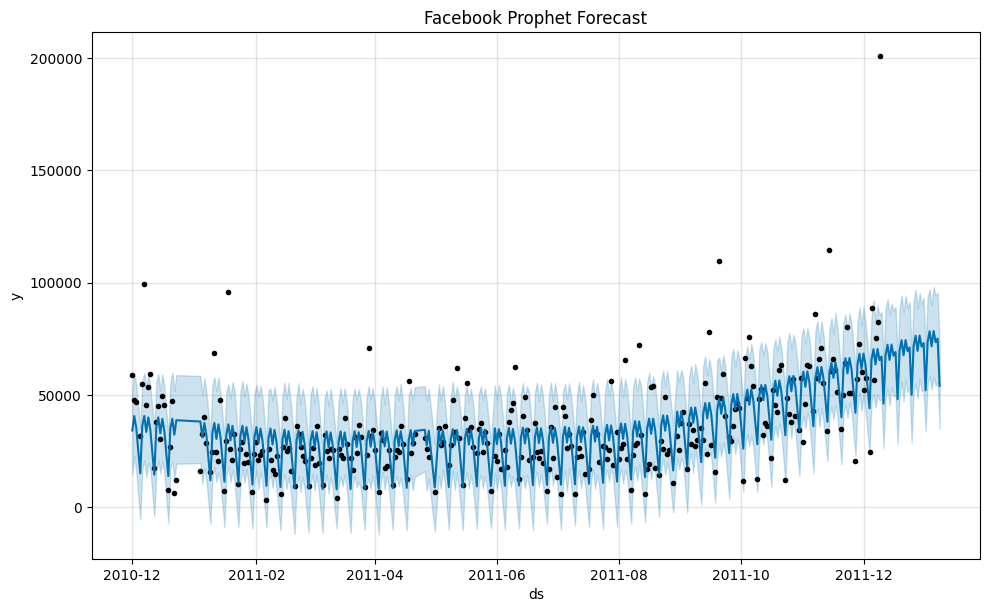

In [ ]:
from prophet import Prophet

# Prepare and fit
prophet = Prophet(daily_seasonality=True)
prophet.fit(daily_sales)

# Future 30 days
future = prophet.make_future_dataframe(periods=30)
forecast = prophet.predict(future)

# Plot
prophet.plot(forecast)
plt.title("Facebook Prophet Forecast")
plt.show()


# **LSTM**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/p

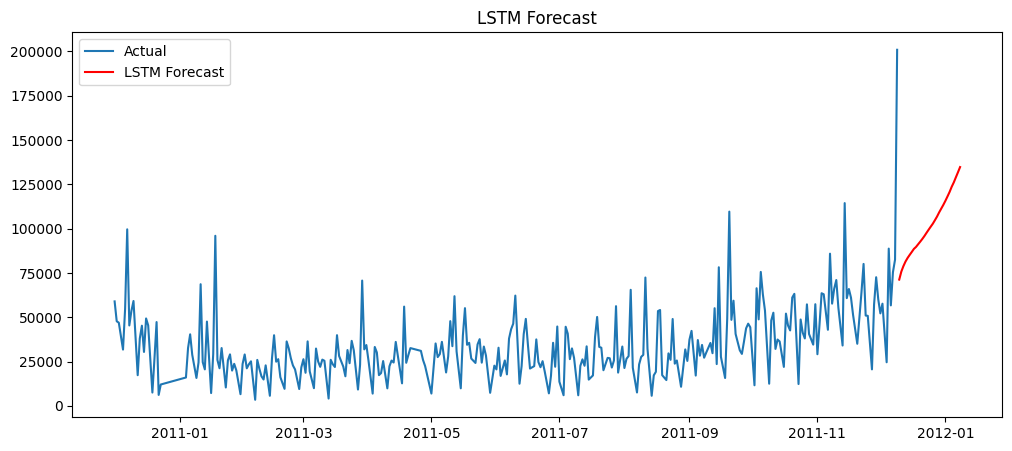

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_sales['y'].values.reshape(-1,1))

# Create sequences
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data)-time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32, verbose=0)

# Forecast next 30 days
input_seq = scaled_data[-30:]
preds = []
for _ in range(30):
    pred = model.predict(input_seq.reshape(1, 30, 1), verbose=0)
    preds.append(pred[0,0])
    input_seq = np.append(input_seq[1:], pred).reshape(30,1)

# Inverse transform
preds = scaler.inverse_transform(np.array(preds).reshape(-1,1)).flatten()

# Plot
plt.figure(figsize=(12,5))
plt.plot(daily_sales['ds'], daily_sales['y'], label='Actual')
future_dates = pd.date_range(start=daily_sales['ds'].iloc[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, preds, color='red', label='LSTM Forecast')
plt.title("LSTM Forecast")
plt.legend()
plt.show()


In [ ]:
!pip install statsmodels

# **SARIMA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
df = pd.read_excel("Online Retail.xlsx", parse_dates=["InvoiceDate"])
df = df.dropna(subset=["CustomerID"])

# Aggregate daily sales
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
daily_sales = df.groupby(df["InvoiceDate"].dt.date)["Quantity"].sum()
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales = daily_sales.asfreq("D").fillna(0)


<ipython-input-13-e93812e9d7d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [ ]:
# Use SARIMA(p,d,q)(P,D,Q,s), let's start with seasonal weekly (s=7)
model = SARIMAX(daily_sales, order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit()

# Forecast next 30 days
forecast = results.get_forecast(steps=30)
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_values = forecast.predicted_mean


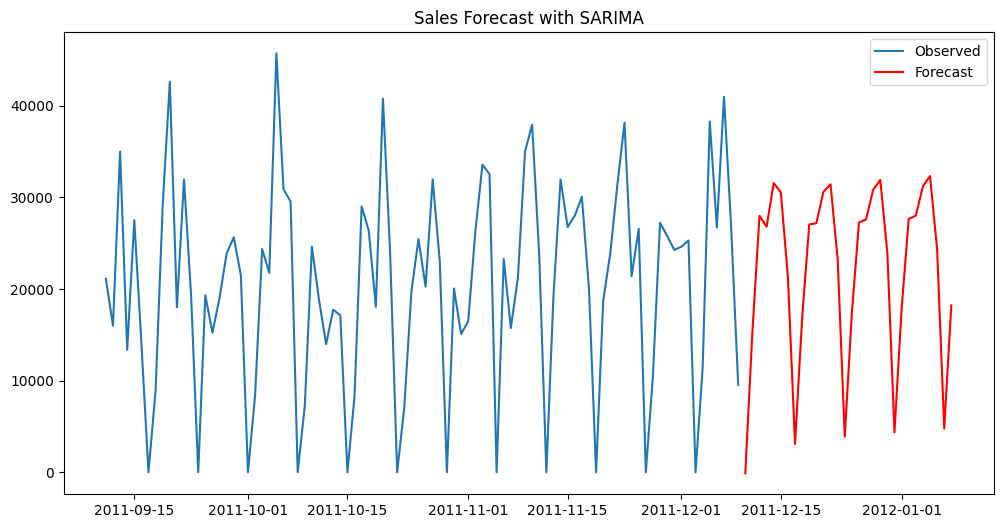

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales[-90:], label="Observed")
plt.plot(forecast_index, forecast_values, label="Forecast", color='red')
plt.title("Sales Forecast with SARIMA")
plt.legend()
plt.show()


In [ ]:
train = daily_sales[:-30]
test = daily_sales[-30:]

model_eval = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
results_eval = model_eval.fit()

pred_eval = results_eval.forecast(steps=30)
mae = mean_absolute_error(test, pred_eval)
rmse = np.sqrt(mean_squared_error(test, pred_eval))

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")


Test MAE: 5668.31
Test RMSE: 7358.64


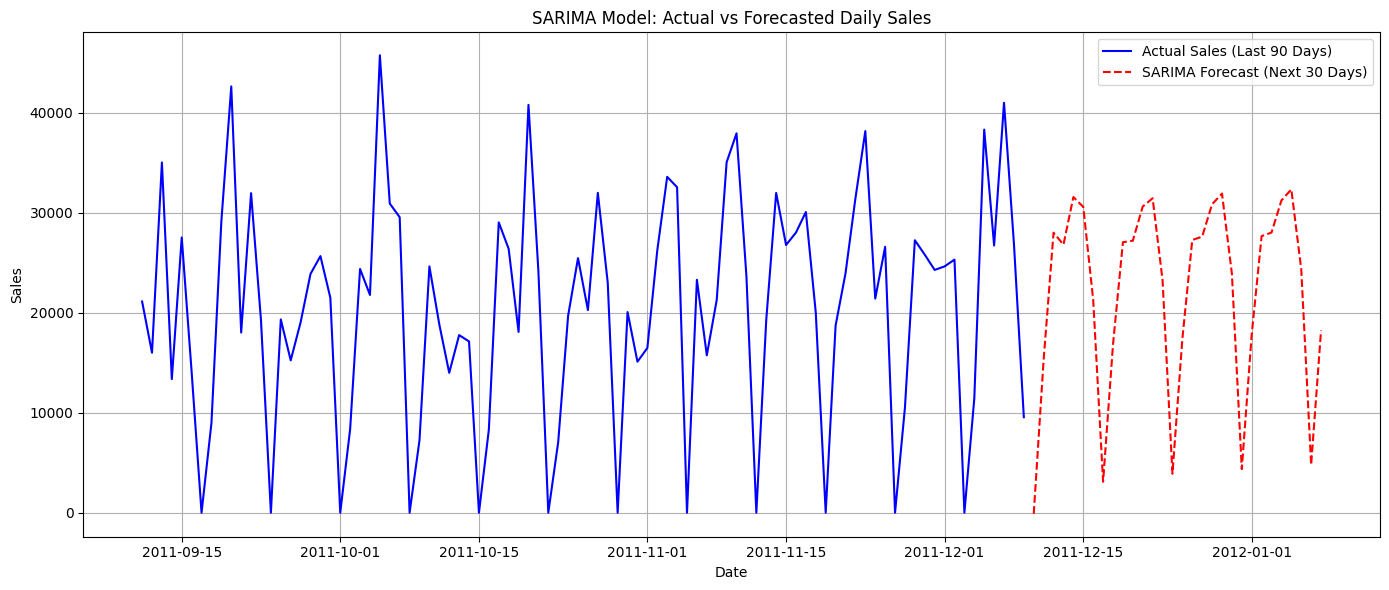

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))
plt.plot(daily_sales[-90:], label='Actual Sales (Last 90 Days)', color='blue')
plt.plot(forecast_index, forecast_values, label='SARIMA Forecast (Next 30 Days)', color='red', linestyle='--')

plt.title('SARIMA Model: Actual vs Forecasted Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **RECOMMENDATION**

# HAVENT WORKED

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scikit-surprise
!pip install --upgrade surprise
# Restart the runtime/kernel
# my code)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463301 sha256=

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import numpy as np

# Load and preprocess
df = pd.read_excel("Online Retail.xlsx")
df = df.dropna(subset=['CustomerID', 'Description'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype(int)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [ ]:
# Create input for Surprise
reader = Reader(rating_scale=(0.1, df['TotalPrice'].max()))
data = Dataset.load_from_df(df[['CustomerID', 'StockCode', 'TotalPrice']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD
svd = SVD()
svd.fit(trainset)

# Predict example
pred = svd.predict(uid=17850, iid='85123A')  # CustomerID, StockCode
print("SVD predicted rating:", pred.est)


NameError: name 'Reader' is not defined

In [ ]:
# Group items
items = df.groupby('StockCode').agg({'Description': 'first'}).reset_index()

# TF-IDF on descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(items['Description'])

# Compute cosine similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend similar items
def recommend_similar_items(item_code, top_n=5):
    idx = items[items['StockCode'] == item_code].index[0]
    scores = list(enumerate(cos_sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    similar_items = [items['StockCode'][i[0]] for i in scores]
    return similar_items

print("Similar items to 85123A:", recommend_similar_items('85123A'))


Similar items to 85123A: ['85123a', 21733, '84970S', '84970s', 21814]


In [ ]:
def hybrid_recommend(customer_id, item_code, alpha=0.5):
    # SVD prediction
    svd_score = svd.predict(customer_id, item_code).est

    # Content similarity (average of similar items' SVD scores)
    similar_items = recommend_similar_items(item_code)
    content_score = np.mean([svd.predict(customer_id, sim_item).est for sim_item in similar_items])

    # Combine
    hybrid_score = alpha * svd_score + (1 - alpha) * content_score
    return hybrid_score

print("Hybrid score (85123A for 17850):", hybrid_recommend(17850, '85123A'))


NameError: name 'svd' is not defined

# **LIGHTFM Recommendation**

In [ ]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp311-cp311-linux_x86_64.whl size=831163 sha256=0ec9df27952becb8f3aafb3f4d322be727027dd14b237c388407def94b8193eb
  Stored in directory: /root/.cache/pip/wheels/b9/0d/8a/0729d2e6e3ca2a898ba55201f905da7db3f838a33df5b3fcdd
Successfully built lightfm


In [ ]:
import pandas as pd
import numpy as np
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, auc_score


In [ ]:
import pandas as pd

# Load the data
df = pd.read_excel("Online Retail.xlsx", usecols=["InvoiceNo", "StockCode", "Description", "Quantity", "InvoiceDate", "CustomerID", "Country"])

# Drop missing values
df.dropna(subset=["CustomerID", "Description"], inplace=True)

# Convert to strings
df["CustomerID"] = df["CustomerID"].astype(str)
df["StockCode"] = df["StockCode"].astype(str)


In [ ]:
from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(users=df["CustomerID"], items=df["StockCode"])

(interactions, weights) = dataset.build_interactions([(row.CustomerID, row.StockCode) for index, row in df.iterrows()])


In [ ]:
from lightfm import LightFM

model = LightFM(loss='warp')
model.fit(interactions, epochs=10, num_threads=2)


In [ ]:
import numpy as np
import random

user_id_map, _, item_id_map, _ = dataset.mapping()
item_labels = {v: k for k, v in item_id_map.items()}

# Pick a random user
user_index = random.choice(list(user_id_map.values()))

# Predict scores
scores = model.predict(user_index, np.arange(len(item_labels)))
top_items = np.argsort(-scores)[:5]
recommended_stockcodes = [item_labels[i] for i in top_items]

print("Top 5 recommendations for user:", recommended_stockcodes)


Top 5 recommendations for user: ['22138', '22139', '22086', '21914', '21915']


In [ ]:
product_names = df.drop_duplicates(subset=["StockCode"])[["StockCode", "Description"]].set_index("StockCode").to_dict()["Description"]
recommended_names = [product_names.get(code, "Unknown") for code in recommended_stockcodes]

print("Recommended Product Names:")
for name in recommended_names:
    print("-", name)


Recommended Product Names:
- BAKING SET 9 PIECE RETROSPOT 
- RETROSPOT TEA SET CERAMIC 11 PC 
- PAPER CHAIN KIT 50'S CHRISTMAS 
- BLUE HARMONICA IN BOX 
- RED  HARMONICA IN BOX 


In [ ]:
from lightfm.evaluation import precision_at_k, auc_score


In [ ]:
# Precision at K (top 5 recommended items)
precision = precision_at_k(model, interactions, k=5).mean()

# AUC score
auc = auc_score(model, interactions).mean()

print(f"Precision@5: {precision:.4f}")
print(f"AUC Score: {auc:.4f}")


Precision@5: 0.3410
AUC Score: 0.8826


In [ ]:
from lightfm.cross_validation import random_train_test_split

train, test = random_train_test_split(interactions, test_percentage=0.2)

model.fit(train, epochs=10, num_threads=2)

precision = precision_at_k(model, test, k=5).mean()
auc = auc_score(model, test).mean()

print(f"Test Precision@5: {precision:.4f}")
print(f"Test AUC Score: {auc:.4f}")


Test Precision@5: 0.1109
Test AUC Score: 0.8572


# **COSINE SIMILARITY**

In [ ]:
import pandas as pd

# Load data
df = pd.read_excel("Online Retail.xlsx")

# Clean data
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Create pivot table (customers x products)
pivot_table = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Create sparse matrix
sparse_matrix = csr_matrix(pivot_table)

# Compute cosine similarity
similarity = cosine_similarity(sparse_matrix.T)

# Map product IDs
product_similarity = pd.DataFrame(similarity, index=pivot_table.columns, columns=pivot_table.columns)


In [ ]:
def recommend_products(product_id, n=5):
    similar_scores = product_similarity[product_id].sort_values(ascending=False)[1:n+1]
    return similar_scores

# Example: Recommend products similar to '84029E'
recommend_products('84029E')


,84029E
StockCode,
82615,0.774201
35004C,0.667486
21107,0.636046
22611,0.624211
22095,0.534144


# **OPTION2**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
# Load & clean
df = pd.read_excel("Online Retail.xlsx")
df = df.dropna(subset=['CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create basket: group items per Invoice
basket = df.groupby(['InvoiceNo'])['Description'].apply(list).tolist()

# One-hot encode basket
te = TransactionEncoder()
basket_matrix = te.fit(basket).transform(basket)
df_basket = pd.DataFrame(basket_matrix, columns=te.columns_)
#apriori
frequent_apriori = apriori(df_basket, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_apriori, metric="lift", min_threshold=1)
rules_apriori = rules_apriori[(rules_apriori['confidence'] > 0.5) & (rules_apriori['lift'] > 1)]
print("Apriori Rules:\n", rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
#FP-Growth
frequent_fpgrowth = fpgrowth(df_basket, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_fpgrowth, metric="lift", min_threshold=1)
rules_fpgrowth = rules_fpgrowth[(rules_fpgrowth['confidence'] > 0.5) & (rules_fpgrowth['lift'] > 1)]
print("FP-Growth Rules:\n", rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
#ECLAT
from itertools import combinations

# Create itemsets
item_sets = {}
for row in df_basket.itertuples(index=False):
    items = set([item for item, val in zip(df_basket.columns, row) if val])
    for i in range(1, 3):  # itemsets of size 1 and 2
        for combo in combinations(items, i):
            item_sets[frozenset(combo)] = item_sets.get(frozenset(combo), 0) + 1

# Support filter
min_support = 0.01 * len(df_basket)
eclat_frequent = {itemset: count for itemset, count in item_sets.items() if count >= min_support}

# Convert to DataFrame
df_eclat = pd.DataFrame([
    {'itemset': k, 'support': v / len(df_basket)} for k, v in eclat_frequent.items()
])
print("ECLAT Frequent Itemsets:\n", df_eclat.head())
#Recommend bundles or products
# Recommend bundle for a product
def recommend_bundle(product, rules):
    return rules[rules['antecedents'].apply(lambda x: product in x)][['antecedents', 'consequents', 'confidence', 'lift']]

print("Recommended bundles for 'WHITE HANGING HEART T-LIGHT HOLDER':\n")
print(recommend_bundle('WHITE HANGING HEART T-LIGHT HOLDER', rules_apriori))


Apriori Rules:
                                            antecedents  \
1                    (60 CAKE CASES DOLLY GIRL DESIGN)   
11                       (60 TEATIME FAIRY CAKE CASES)   
16                    (ALARM CLOCK BAKELIKE CHOCOLATE)   
18                    (ALARM CLOCK BAKELIKE CHOCOLATE)   
20                        (ALARM CLOCK BAKELIKE IVORY)   
..                                                 ...   
915  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
920  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...   
921  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...   
922  (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.,...   
923  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...   

                                           consequents   support  confidence  \
1                    (PACK OF 72 RETROSPOT CAKE CASES)  0.010196    0.533898   
11                   (PACK OF 72 RETROSPOT CAKE CASES)  0.017803    0.502283   
16                        (ALARM CLOCK BAKELIKE